# Imersão Dados

Antes de tudo temos que importar uma biblioteca chamada Pandas, ela é específica para trabalharmos com DataFrames (que são os dados organizados como uma tabela de Excel, por exemplo)

In [ ]:
import pandas as pd
import numpy as np

Depois de importado a biblioteca Pandas, indicamos onde está o arquivo que queremos trabalhar, no caso, é um endereço na internet, logo, temos que atribuir esse endereço em uma variável, no caso, chamei ela de "caminho".

Depois, criamos outra variável e acionamos a biblioteca Pandas para fazer a leitura desse arquivo (que está no formato .csv (valores separados por vírgula), esse formato pode ser diverso: html, .json, pdf).

Após fazer a leitura, pedimos para exibir somente as 5 primeiras linhas desse DataFrame com o comando .head() - que é o cabeçalho do DataFrame.

In [ ]:
caminho = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"

dados = pd.read_csv(caminho)

dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


Uma boa prática para saber como está o DataFrame, além da visualização dele como foi feita acima, podemos usar o comando .info(), que mostra como estão gravados os registros e em quais formatos eles se encontram.

Note na tabela abaixo que a tabela "Valor" possui Dtype = object. Com esse formato não conseguimos realizar operações matemáticas.

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [ ]:
dados.Valor # Aqui é uma forma de exibir somente a coluna Valor e, quando exibimos uma única coluna chamamos ela de Serie. Duas ou mais colunas é um DataFrame.

0                                R$ 7.000.000
1                                R$ 3.700.000
2                                  R$ 380.000
3                                  R$ 685.000
4                                  R$ 540.000
                         ...                 
10003                              R$ 665.000
10004                            R$ 2.300.000
10005                            R$ 1.050.000
10006    R$ 2.200\n                      /Mês
10007                              R$ 270.000
Name: Valor, Length: 10008, dtype: object

A visualização padrão do DataFrame exibe as primeiras e as últimas linhas dos registros, note que o arquivo possui 10.008 registros (começa com o registro 0)

In [ ]:
dados.Valor[10006] # Aqui estou chamando somente o registro numero 10.006, pois, na consulta acima ele mostra que está registrado diferente:

'R$ 2.200\n                      /Mês'

# Tratamento e Limpeza dos Dados:

<hr>

Para execução dos cálculos aritméticos é mandatório transformar os registros em valores numéricos e, antes de fazer isso, temos que remover todas as interferências para essa conversão, no caso, temos que remover o R cifrão (tem um espaço depois do $), temos que remover os pontos de milhares (.) e por fim, tratar os registros que adicionaram informações à mais do que os números, no exemplo do registro 10.006, além do 2.200, foi registrado "\n            /Mês".

In [ ]:
dados["Valor"] = dados["Valor"].str.replace("R$ ","", regex=False) # Aqui removemos o R$ e o espaço a frente dele

In [ ]:
dados.Valor = dados.Valor.str.replace(".", "", regex=False) # Aqui removemos os pontos de milhares (.)

In [ ]:
dados.Valor.sample(30) # Aqui fazemos uma amostragem de 30 elementos para ver a formatação

3977                              3500000
2709                             14000000
2788                               421000
1779                               795000
4586     6900\n                      /Mês
1368                              2000000
2601                              2500000
1831                              1321000
3773                              2700000
4950                              2250000
930                              15000000
828                                450000
3983    25000\n                      /Mês
283      6000\n                      /Mês
7989                               690000
7521                              2700000
9381                              1200000
6876                              8500000
9435                              3600000
4308                              4000000
5304                               720000
6797                              1990000
9194     9500\n                      /Mês
6072     6000\n                   

In [ ]:
dados.Valor = dados.Valor.str.replace("\n                      /Mês","", regex=False) # aqui removemos a string (texto) "\n                      /Mês"

In [ ]:
dados.Valor = dados.Valor.str.replace("\n                      /Ano","", regex=False) # aqui removemos a string (texto) "\n                      /Ano"

In [ ]:
dados.Valor = dados.Valor.str.replace("\n                      /Dia","", regex=False) # aqui removemos a string (texto) "\n                      /Dia"

In [ ]:
dados.Valor = dados.Valor.astype(float) # Finalmente convertemos a coluna Valor de object para o formato Float (número decimal)

In [ ]:
dados.info() # Após a conversão checamos o DataFrame com o comando .info() e verificamos que a coluna "Valor" agora é do tipo Float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Rua        6574 non-null   object 
 1   Bairro     9996 non-null   object 
 2   Cidade     10008 non-null  object 
 3   Metragem   10008 non-null  int64  
 4   Quartos    10008 non-null  int64  
 5   Banheiros  10008 non-null  int64  
 6   Vagas      10008 non-null  int64  
 7   Valor      10008 non-null  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 625.6+ KB


In [ ]:
dados.Valor.min() # Aqui checamos o menor valor

1650.0

In [ ]:
dados.Valor.max() # AQui checamos o maior valor

65000000.0

In [ ]:
dados.Valor.mean() # E finalmente realizamos a média dos valores da coluna "Valor"

2794169.56205036

In [ ]:
dados["Bairro"] = dados["Bairro"].apply(lambda x:str(x).replace("Vila Água Funda", "Água Funda")) # renomeando o bairro 'Vila Água Funda' para 'Água Funda'

In [ ]:
bairros_vazios = dados.Bairro == 'nan'

dados[bairros_vazios]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
7263,"Rua Madalena de Morais, 3773",nan,São Paulo,742,4,8,6,9800.0
7956,Rua Vergueiro,nan,São Paulo,103,3,2,2,640000.0
7996,"Rua Alvorada do Sul, 3773",nan,São Paulo,678,4,8,8,6895000.0
8126,"Rua Professor Eduardo Monteiro, 3773",nan,São Paulo,550,3,5,6,4000000.0
8566,"Avenida Comendador Adibo Ares, 3773",nan,São Paulo,694,4,6,6,3890000.0
8619,"Rua Alvorada do Sul, 3773",nan,São Paulo,683,4,8,8,6895000.0
8739,"Rua Alvorada do Sul, 3773",nan,São Paulo,683,4,8,8,6895000.0
8868,"Rua Professor Eduardo Monteiro, 3773",nan,São Paulo,555,3,5,6,4000000.0
8943,"Rua Santo Eufredo, 3773",nan,São Paulo,846,4,8,8,30000.0
8992,"Rua Professor Eduardo Monteiro, 3773",nan,São Paulo,555,3,5,6,4000000.0


In [ ]:
dados[dados['Bairro']=='nan']

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
7263,"Rua Madalena de Morais, 3773",nan,São Paulo,742,4,8,6,9800.0
7956,Rua Vergueiro,nan,São Paulo,103,3,2,2,640000.0
7996,"Rua Alvorada do Sul, 3773",nan,São Paulo,678,4,8,8,6895000.0
8126,"Rua Professor Eduardo Monteiro, 3773",nan,São Paulo,550,3,5,6,4000000.0
8566,"Avenida Comendador Adibo Ares, 3773",nan,São Paulo,694,4,6,6,3890000.0
8619,"Rua Alvorada do Sul, 3773",nan,São Paulo,683,4,8,8,6895000.0
8739,"Rua Alvorada do Sul, 3773",nan,São Paulo,683,4,8,8,6895000.0
8868,"Rua Professor Eduardo Monteiro, 3773",nan,São Paulo,555,3,5,6,4000000.0
8943,"Rua Santo Eufredo, 3773",nan,São Paulo,846,4,8,8,30000.0
8992,"Rua Professor Eduardo Monteiro, 3773",nan,São Paulo,555,3,5,6,4000000.0


<hr>

#Desafios:

1 - Realizar a média da metragem para cada um dos bairros (Paulo)

2 - 2 formas de selecionar os dados por bairro (consultar os métodos na documentação do pandas) (Thiago)

3 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, tentar colocar alguma conclusão (Thiago)

4 - Pegar outros estatísticas dos dados, média, mediana, mim, max (Vivi)

5 - Descobrir quais são os bairros que não tem nome de Rua. (Vivi)

<hr>

DESAFIO # 1:

Realizar a média da metragem para cada um dos bairros (Paulo)

In [ ]:
dados.Metragem.mean() # Média geral

442.30065947242207

In [ ]:
dados.groupby('Bairro').mean()['Metragem'].to_frame().reset_index() # Média das Metragens agrupadas por Bairro 

,Bairro,Metragem
0,Aclimação,253.056818
1,Alto da Boa Vista,418.875000
2,Alto da Lapa,294.337209
3,Alto da Mooca,270.050000
4,Alto de Pinheiros,433.444988
...,...,...
696,nan,621.333333
697,Água Branca,191.000000
698,Água Fria,165.416667
699,Água Funda,148.428571


<hr>

DESAFIO # 2:

2 formas de selecionar os dados por bairro (consultar os métodos na documentação do pandas) (Thiago)

In [ ]:
dados.Bairro.head()

0     Planalto Paulista
1    Jardim dos Estados
2       Jardim Reimberg
3        Jardim Morumbi
4                 Mooca
Name: Bairro, dtype: object

In [ ]:
dados["Bairro"].head()

0     Planalto Paulista
1    Jardim dos Estados
2       Jardim Reimberg
3        Jardim Morumbi
4                 Mooca
Name: Bairro, dtype: object

<hr>

DESAFIO # 3

 Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, tentar colocar alguma conclusão (Thiago)

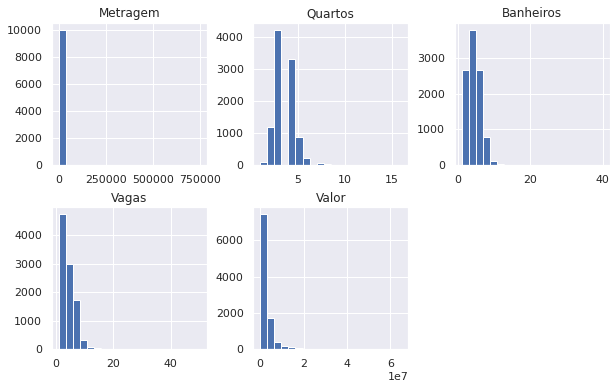

In [ ]:
dados.hist(figsize=(10,6), layout=(2,3), bins=20)
print()

In [ ]:
import seaborn as sns # importando a biblioteca gráfica Seaborn

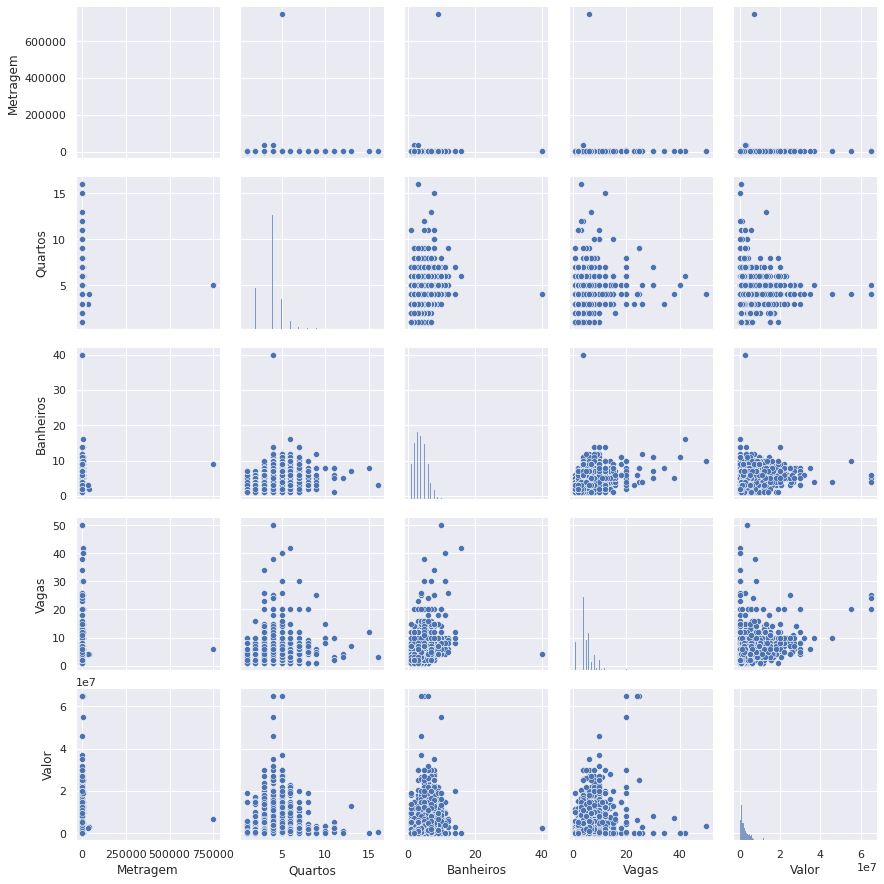

In [ ]:
sns.pairplot(dados) # exibe um gráfico de comparação de pares

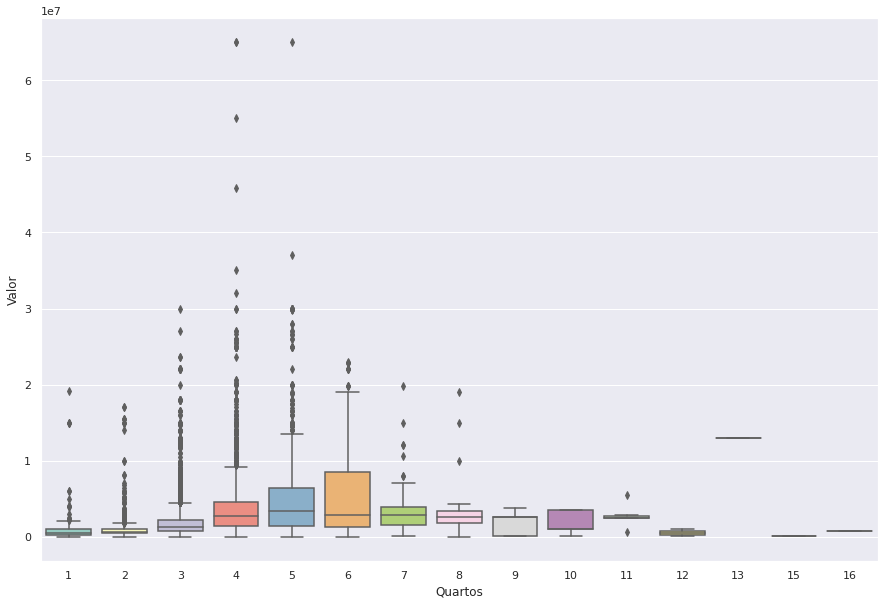

In [ ]:
ax = sns.boxplot(x='Quartos', y= 'Valor', data=dados, palette='Set3', linewidth=1.5)

ax = sns.set(rc = {'figure.figsize':(15,10)})

<hr>

DESAFIO # 4

 Pegar outros estatísticas dos dados, média, mediana, mim, max (Vivi)

In [ ]:
dados.describe().T # Obtendo a contagem dos dados, média, desvio-padrão, quartis, mediana, valor mínimo e máximo:

,count,mean,std,min,25%,50%,75%,max
Metragem,10008.0,4.423007e+02,7.515379e+03,10.0,173.0,290.0,460.25,750000.0
Quartos,10008.0,3.483114e+00,1.064200e+00,1.0,3.0,3.0,4.00,16.0
Banheiros,10008.0,3.879097e+00,1.988467e+00,1.0,2.0,4.0,5.00,40.0
Vagas,10008.0,4.097222e+00,2.824014e+00,1.0,2.0,4.0,5.00,50.0
Valor,10008.0,2.794170e+06,3.866249e+06,1650.0,750000.0,1600000.0,3350000.00,65000000.0


<hr>

DESAFIO # 5

Descobrir quais são os bairros que não tem nome de Rua. (Vivi)

In [ ]:
ruas_sem_nome = dados.Rua.isnull() # localizando as ruas que estão sem nome (campos vazios ou NAN)

In [ ]:
dados['Bairro'][ruas_sem_nome] # filtrando os dados pelos Bairros que possuem ruas sem nome

3                         Jardim Morumbi
11                      Jardim Luzitânia
31                        Parque da Lapa
56      Chácara Santo Antônio (Zona Sul)
57                        Jardim Guedala
                      ...               
9963                   Jardim Petrópolis
9989                Parque Alves de Lima
9991                        Vila Formosa
9995                       Jardim Leonor
9999                   Jardim Petrópolis
Name: Bairro, Length: 3434, dtype: object